In [90]:
import scipy
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
#load data
data = pd.read_csv('austin_weather.csv')
print(data.shape)


(1319, 21)


In [107]:
data.head(10)
sub_data = data[['TempAvgF','DewPointAvgF','HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH','PrecipitationSumInches', 'Events']]
sub_data.head()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,Events
0,60,49,75,29.68,7,4,0.46,"Rain , Thunderstorm"
1,48,36,68,30.13,10,6,0,
2,45,27,52,30.49,10,3,0,
3,46,28,56,30.45,10,4,0,
4,50,40,71,30.33,10,2,T,


In [108]:
#describe data
print(sub_data.describe())
print(sub_data.info())

          TempAvgF
count  1319.000000
mean     70.642911
std      14.045904
min      29.000000
25%      62.000000
50%      73.000000
75%      83.000000
max      93.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
TempAvgF                     1319 non-null int64
DewPointAvgF                 1319 non-null object
HumidityAvgPercent           1319 non-null object
SeaLevelPressureAvgInches    1319 non-null object
VisibilityAvgMiles           1319 non-null object
WindAvgMPH                   1319 non-null object
PrecipitationSumInches       1319 non-null object
Events                       1319 non-null object
dtypes: int64(1), object(7)
memory usage: 82.6+ KB
None


In [109]:
print(sub_data.groupby('TempAvgF').size())

TempAvgF
29     3
30     1
32     2
33     2
34     7
      ..
89    48
90    26
91    10
92     6
93     1
Length: 64, dtype: int64


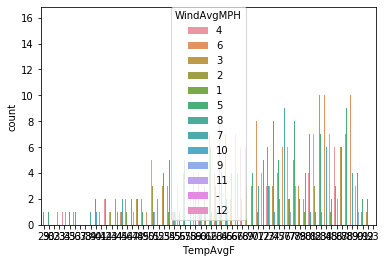

In [110]:
sns.countplot(x='TempAvgF', hue='WindAvgMPH', data = sub_data)

In [111]:
sub_data.isnull().sum()

TempAvgF                     0
DewPointAvgF                 0
HumidityAvgPercent           0
SeaLevelPressureAvgInches    0
VisibilityAvgMiles           0
WindAvgMPH                   0
PrecipitationSumInches       0
Events                       0
dtype: int64

In [112]:
sub_data = sub_data.replace('T', 0.0) 
sub_data = sub_data.replace('-', 0.0)
sub_data.head(20)

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,Events
0,60,49,75,29.68,7,4,0.46,"Rain , Thunderstorm"
1,48,36,68,30.13,10,6,0,
2,45,27,52,30.49,10,3,0,
3,46,28,56,30.45,10,4,0,
4,50,40,71,30.33,10,2,0,
5,48,36,63,30.4,9,3,0,
6,53,39,65,30.39,9,1,0,
7,51,39,64,30.17,10,2,0,
8,50,41,76,30.1,10,5,0,
9,40,26,60,30.33,10,5,0,


In [113]:
sub_data.drop("Events",axis =1,inplace =True)

In [114]:
sub_data.head()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches
0,60,49,75,29.68,7,4,0.46
1,48,36,68,30.13,10,6,0
2,45,27,52,30.49,10,3,0
3,46,28,56,30.45,10,4,0
4,50,40,71,30.33,10,2,0


In [115]:
#split data
array_Data =sub_data.values
X = array_Data[:,1:]
Y = array_Data[:,0]
t_size = 0.2
seed =2

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = t_size, random_state = seed)

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
linearRM = LinearRegression()

In [119]:
linearRM.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
r_sq =linearRM.score(X_train, Y_train)
r_sq

0.899290374895695

In [145]:
y_predV = linearRM.predict(X_test)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [150]:
#print(Y_test[:10])
#print(y_predV[:10])
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_predV})
df.head()

,Actual,Predicted
0,87,82.151484
1,74,75.077070
2,86,82.167630
3,73,72.588015
4,84,81.898538


Text(0, 0.5, 'Predicted Values')

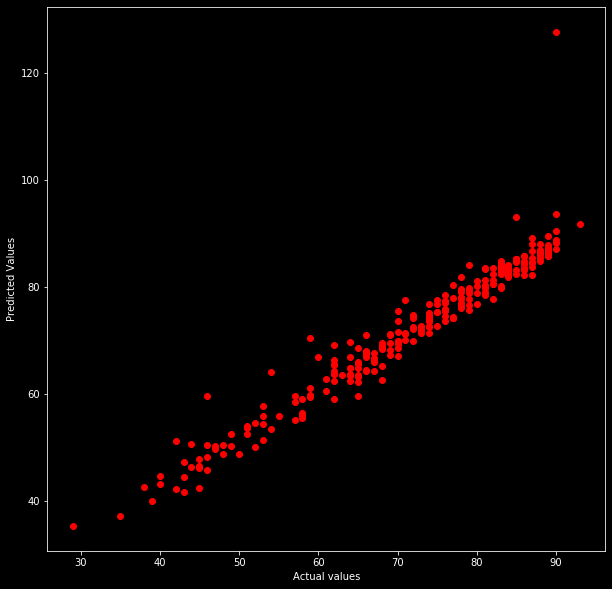

In [152]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 10))
plt.scatter(Y_test, y_predV, c = 'red')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')

In [156]:
# Checking the accuracy  of the model 
import sklearn.metrics as metrics

print("Accuracy of the model =",linearRM.score(X_train, Y_train))
print("Mean absolute error =", round(metrics.mean_absolute_error(Y_test, y_predV),2)) 
print("Mean squared error =", round(metrics.mean_squared_error(Y_test, y_predV), 2)) 
print("Median absolute error =", round(metrics.median_absolute_error(Y_test, y_predV), 2)) 
print("Explain variance score =", round(metrics.explained_variance_score(Y_test, y_predV), 2)) 
print("R2 score =", round(metrics.r2_score(Y_test, y_predV), 2))


Accuracy of the model = 0.899290374895695
Mean absolute error = 2.1
Mean squared error = 12.65
Median absolute error = 1.56
Explain variance score = 0.94
R2 score = 0.93
